In [21]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [22]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.16.2


In [23]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(256, 256, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

In [24]:
model=Model(inputs=model_d.input,outputs=preds)
# model.summary()

In [25]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [32]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [33]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="D:\\pest\\plants\\train",target_size=(256,256),batch_size = 32,
                                                 class_mode = 'binary')
testdata = tsdata.flow_from_directory(directory="D:\\pest\\plants\\test", target_size=(256,256),batch_size = 32,
                                                 class_mode = 'binary')

Found 13637 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("DenseNet121.keras", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='max')

history = model.fit(traindata, validation_data=testdata, epochs=20, callbacks=[checkpoint, early])


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000186BB4FEA70>

In [ ]:
accuracy = model.evaluate(testdata)

print('Test set accuracy:', accuracy[1]*100)

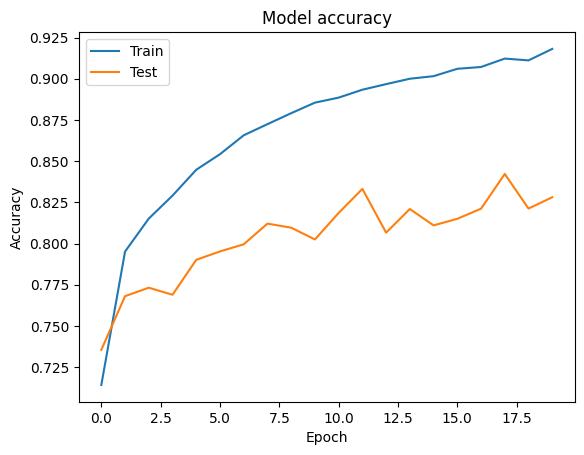

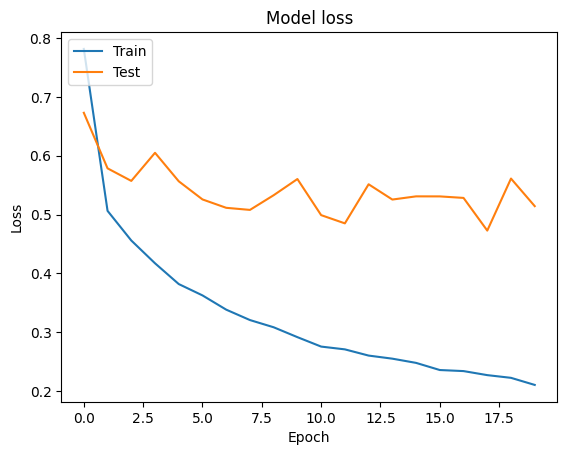

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
model.save("pest_model.h5", include_optimizer=True)
